In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, roc_auc_score, classification_report, confusion_matrix
#for the 2nd part
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [60]:
#loading the images
images = np.load("/mnt/c/users/admin/desktop/F21DL/smiley_dataset/smiley_noisy_X.npy")

In [61]:
#loading the classes
classes = np.load("/mnt/c/users/admin/desktop/F21DL/smiley_dataset/smiley_noisy_Y.npy")

In [62]:
print("Images shape:", images.shape)


Images shape: (204, 9, 9, 1)


In [5]:
print("Classes shape:", classes.shape)

Classes shape: (204,)


In [6]:
#verifying the number of unique classes with their corresponding leabels
# Get the unique classes and their counts
unique_classes, class_counts = np.unique(classes, return_counts=True)
# Print the unique classes and their counts
for class_label, count in zip(unique_classes, class_counts):
    print("Class:", class_label, "Count:", count)


Class: 0.0 Count: 72
Class: 1.0 Count: 60
Class: 2.0 Count: 72


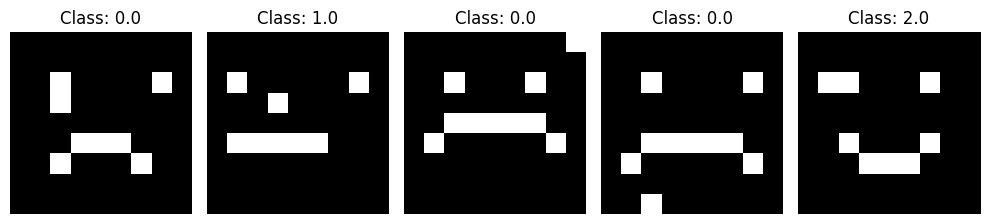

In [7]:
# Select some random indices for visualization
indices = np.random.choice(len(images), size=5, replace=False)

# Plot the selected images
fig, axes = plt.subplots(1, len(indices), figsize=(10, 4))
for i, index in enumerate(indices):
    axes[i].imshow(images[index, :, :, 0], cmap='gray')
    axes[i].set_title(f"Class: {classes[index]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.2, random_state=42)

In [9]:
# Create an instance of the Naïve Bayes classifier
naive_bayes = GaussianNB()



In [10]:
# Train the classifier on the training set
naive_bayes.fit(X_train.reshape(X_train.shape[0], -1), y_train)



GaussianNB()

In [11]:
# Reshape the testing set to match the input format
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


In [12]:

# Make predictions on the testing set
y_pred = naive_bayes.predict(X_test_reshaped)


In [13]:

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6829268292682927


In [14]:
# Generate and print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)



Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.67      0.74        15
         1.0       0.39      0.78      0.52         9
         2.0       1.00      0.65      0.79        17

    accuracy                           0.68        41
   macro avg       0.74      0.70      0.68        41
weighted avg       0.80      0.68      0.71        41



In [15]:
# Generate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)


Confusion Matrix:
 [[10  5  0]
 [ 2  7  0]
 [ 0  6 11]]


In [16]:

# Calculate and print TP rate, FP rate, precision, recall, and F measure
tp_rate = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[1, 0])
fp_rate = confusion_mat[0, 1] / (confusion_mat[0, 1] + confusion_mat[0, 0])
precision = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[0, 1])
recall = tp_rate
f_measure = 2 * (precision * recall) / (precision + recall)


In [17]:

print("TP Rate:", tp_rate)
print("FP Rate:", fp_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F Measure:", f_measure)



TP Rate: 0.7777777777777778
FP Rate: 0.3333333333333333
Precision: 0.5833333333333334
Recall: 0.7777777777777778
F Measure: 0.6666666666666666


In [18]:
# Calculate and print ROC area
if len(unique_classes) == 2:  # Binary classification
    roc_area = roc_auc_score(y_test, y_pred)
else:  # Multi-class classification
    y_prob = naive_bayes.predict_proba(X_test_reshaped)
    roc_area = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC Area:", roc_area)

ROC Area: 0.8579714471258589


In [41]:
#THIS IS THE BEGINING OF THE SECOND PART OF THE ASSIGNMENT
#PART TWO BEGINS HERE
evaluation_scores = []
images_2d = images.reshape(images.shape[0], -1)


In [42]:
# Create an instance of the KMeans clustering algorithm
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the k-means algorithm to the data
kmeans.fit(images_2d)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [43]:
# Get the predicted cluster labels for the samples
cluster_labels = kmeans.labels_

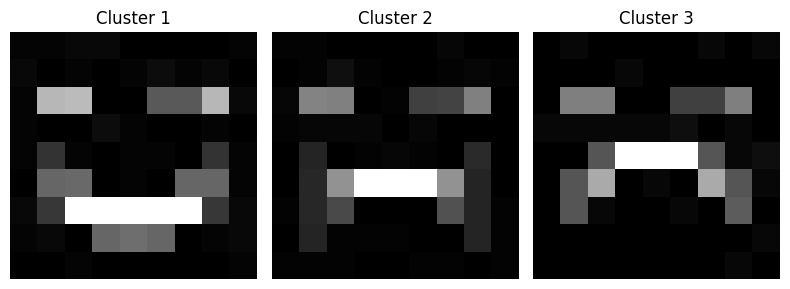

In [44]:
# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Define the image dimensions
image_height = 9
image_width = 9

# Plot the cluster centers
plt.figure(figsize=(8, 3))
for i, center in enumerate(cluster_centers):
    plt.subplot(1, len(cluster_centers), i + 1)
    plt.imshow(center.reshape((image_height, image_width)), cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i+1}')
plt.tight_layout()
plt.show()


In [45]:


# Calculate the ARI between the cluster labels and the ground truth labels
kmeans_ari = adjusted_rand_score(classes, cluster_labels)
print("Adjusted Rand Index (ARI):", kmeans_ari)


Adjusted Rand Index (ARI): 0.31288134543314644


In [46]:
#implemeningt NMI for Kmeans clustering
kmeans_nmi = normalized_mutual_info_score(classes, cluster_labels)
#print the NMI score
print("NMI SCORe:", kmeans_nmi)

NMI SCORe: 0.4082922230357654


In [47]:
# Store the scores for K-means
kmeans_scores = {
    "ARI": kmeans_ari,
    "NMI": kmeans_nmi
}
evaluation_scores.append(("K-means", kmeans_scores))


In [48]:
#implementing EM cLustering using GMM

# Create an instance of the GaussianMixture algorithm
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the GMM to the data
gmm.fit(images_2d)

# Get the cluster labels
gmm_labels = gmm.predict(images_2d)

# Calculate the ARI for the GMM clustering
gmm_ari = adjusted_rand_score(classes, gmm_labels)

# Print the ARI score
print("Adjusted Rand Index (ARI):", gmm_ari)

Adjusted Rand Index (ARI): 0.1738089537945894


In [49]:
#implemeningt NMI for GMM clustering
gmm_nmi = normalized_mutual_info_score(classes, gmm_labels)
#print the NMI score
print("NMI SCORE:", gmm_nmi)

NMI SCORE: 0.2620522555057271


In [50]:
# Store the scores for GMM
gmm_scores = {
    "ARI": gmm_ari,
    "NMI": gmm_nmi
}
evaluation_scores.append(("GMM", gmm_scores))

In [51]:
#implementing Hierarchical Clustering
# Create an instance of the AgglomerativeClustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=3)

# Fit the hierarchical clustering algorithm to the data
hierarchical.fit(images_2d)

# Get the cluster labels
hierarchical_labels = hierarchical.labels_
# Calculate the ARI for the hierarchical clustering
hierarchical_ari = adjusted_rand_score(classes, hierarchical_labels)
print("Evaluation Metric Score:", hierarchical_ari)

Evaluation Metric Score: 0.31288134543314644


In [52]:
#implemeningt NMI for HIERARCHICAL clustering
hierarchical_nmi = normalized_mutual_info_score(classes, hierarchical_labels)
#print the NMI score
print("NMI SCORE:", hierarchical_nmi)

NMI SCORE: 0.4082922230357654


In [53]:
# Store the scores for Hierarchical clustering
hierarchical_scores = {
    "ARI": hierarchical_ari,
    "NMI": hierarchical_nmi
}
evaluation_scores.append(("Hierarchical", hierarchical_scores))

In [55]:
# Accessing the scores for K-means
kmeans_scores = evaluation_scores[0][1]
kmeans_ari = kmeans_scores["ARI"]
kmeans_nmi = kmeans_scores["NMI"]
print(kmeans_ari)

0.31288134543314644


In [69]:
for num_clusters in range(2,10):
    kmeans = KMeans(n_clusters = num_clusters,n_init = 10, random_state = 42)
    kmeans.fit(images_2d)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(images_2d, cluster_labels)
    print(f"Number of Clusters:{num_clusters}\t Silhouette Score:{silhouette_avg}")

Number of Clusters:2	 Silhouette Score:0.18165692033557343
Number of Clusters:3	 Silhouette Score:0.23420250724513783
Number of Clusters:4	 Silhouette Score:0.26534922414551465
Number of Clusters:5	 Silhouette Score:0.24599081156829672
Number of Clusters:6	 Silhouette Score:0.26690535743739685
Number of Clusters:7	 Silhouette Score:0.2864274295083049
Number of Clusters:8	 Silhouette Score:0.2642849222615735
Number of Clusters:9	 Silhouette Score:0.26002276500616256


In [76]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Check the number of unique labels
num_unique_labels = len(set(classes))
if num_unique_labels < 2:
    print("Error: Number of unique labels is less than 2. Unable to compute evaluation metrics.")
else:
    # Loop over different numbers of clusters
    for num_clusters in range(2, 10):
        # K-means
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(images_2d)
        kmeans_labels = kmeans.labels_
        kmeans_silhouette = silhouette_score(images_2d, kmeans_labels)
        kmeans_ari = adjusted_rand_score(classes, kmeans_labels)
        print(f"K-means: Number of Clusters: {num_clusters}\t Silhouette Score: {kmeans_silhouette}\t ARI: {kmeans_ari}")

        # Hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
        hierarchical.fit(images_2d)
        hierarchical_labels = hierarchical.labels_
        hierarchical_silhouette = silhouette_score(images_2d, hierarchical_labels)
        hierarchical_ari = adjusted_rand_score(classes, hierarchical_labels)
        print(f"Hierarchical Clustering: Number of Clusters: {num_clusters}\t Silhouette Score: {hierarchical_silhouette}\t ARI: {hierarchical_ari}")

        # DBSCAN
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        dbscan.fit(images_2d)
        dbscan_labels = dbscan.labels_
        dbscan_silhouette = silhouette_score(images_2d, dbscan_labels)
        dbscan_ari = adjusted_rand_score(classes, dbscan_labels)
        print(f"DBSCAN: Number of Clusters: {len(set(dbscan_labels))}\t Silhouette Score: {dbscan_silhouette}\t ARI: {dbscan_ari}")


/home/epospiky/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means: Number of Clusters: 2	 Silhouette Score: 0.18165692033557343	 ARI: 0.338218021142122
Hierarchical Clustering: Number of Clusters: 2	 Silhouette Score: 0.17680253469372778	 ARI: 0.0900497790704178


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
# Create a list of algorithm names and evaluation scores
algorithm_names, scores = zip(*evaluation_scores)

# Get the evaluation metric names (e.g., ARI, NMI)
metric_names = list(evaluation_scores[0][1].keys())

# Set the position of the bars on the x-axis
x = np.arange(len(algorithm_names))

# Set the width of the bars
bar_width = 0.2

# Create subplots for each evaluation metric
fig, ax = plt.subplots()
for i, metric_name in enumerate(metric_names):
    # Calculate the position of each bar
    pos = x + (i - len(metric_names) / 2) * bar_width

    # Get the scores for the current evaluation metric
    metric_scores = [score[1][metric_name] for score in evaluation_scores]

    # Plot the bars for the current evaluation metric
    ax.bar(pos, metric_scores, bar_width, label=metric_name)

# Set the x-axis labels and tick positions
ax.set_xticks(x)
ax.set_xticklabels(algorithm_names)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Evaluation Metric Score')
plt.title('Comparison of Clustering Algorithms')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()